In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error,r2_score, confusion_matrix, classification_report

%matplotlib inline

In [67]:
# load datasets
exchange = pd.read_csv('Monthly Exchange Rates.csv')

In [69]:
exchange

,Year,Variables,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2025,Inter-Bank Exchange Rate - End Period (GHC/US$),15.3000,15.5300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025,Inter-Bank Exchange Rate - Month Average (GHC/...,14.9720,15.4860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025,Inter-Bank Exchange Rate - End Period (GHC/GBP),19.0003,19.5484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025,Inter-Bank Exchange Rate - Month Average (GHC/...,18.4715,19.4277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025,Inter-Bank Exchange Rate - End Period (GHC/EURO),15.9012,16.1524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2025,Inter-Bank Exchange Rate - Month Average (GHC/...,15.5062,16.1333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024,Inter-Bank Exchange Rate - End Period (GHC/US$),12.0356,12.4642,12.8770,13.2739,14.1301,14.5860,14.9009,15.1899,15.8000,16.3000,15.2700,14.7000
7,2024,Inter-Bank Exchange Rate - Month Average (GHC/...,11.9344,12.2301,12.6674,13.0381,13.7823,14.3298,14.7467,15.1037,15.5575,15.9889,15.9834,14.7805
8,2024,Inter-Bank Exchange Rate - End Period (GHC/GBP),15.3027,15.8022,16.2617,16.6243,17.9996,18.4375,19.1305,19.9261,21.1823,20.9700,19.3952,18.4008
9,2024,Inter-Bank Exchange Rate - Month Average (GHC/...,15.1566,15.4398,16.1056,16.3112,17.4317,18.2184,18.9671,19.5605,20.5562,20.8576,20.3689,18.6876


In [71]:
exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       42 non-null     int64  
 1   Variables  42 non-null     object 
 2   Jan        42 non-null     float64
 3   Feb        42 non-null     float64
 4   Mar        36 non-null     float64
 5   Apr        36 non-null     float64
 6   May        36 non-null     float64
 7   Jun        36 non-null     float64
 8   Jul        36 non-null     float64
 9   Aug        36 non-null     float64
 10  Sep        36 non-null     float64
 11  Oct        36 non-null     float64
 12  Nov        36 non-null     float64
 13  Dec        36 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 4.7+ KB


In [73]:
exchange.isnull().sum()

Year         0
Variables    0
Jan          0
Feb          0
Mar          6
Apr          6
May          6
Jun          6
Jul          6
Aug          6
Sep          6
Oct          6
Nov          6
Dec          6
dtype: int64

# Data Cleaning

In [75]:
print(exchange.columns.tolist())

['Year', 'Variables', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [77]:
exchange.columns = exchange.columns.str.strip()

In [79]:
exchange_melted = exchange.melt(id_vars=['Year', 'Variables'],
                              value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                              var_name = 'Month',
                              value_name='Exchange_Rate'
                             )

In [81]:
month_map = {'Jan':'01', 'Feb':'02', 'Mar':'03', 'Apr':'04', 'May':'05', 'Jun':'06',
            'Jul':'07', 'Aug':'08', 'Sep':'09', 'Oct':'10', 'Nov':'11', 'Dec':'12'}
exchange_melted['Month_num'] = exchange_melted['Month'].map(month_map)
exchange_melted['Month_num'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 504 entries, 0 to 503
Series name: Month_num
Non-Null Count  Dtype 
--------------  ----- 
504 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [83]:
exchange_melted['Year'] = exchange_melted['Year'].astype(str) + '-' + exchange_melted['Month_num']

In [85]:
exchange_melted.head(20)

,Year,Variables,Month,Exchange_Rate,Month_num
0,2025-01,Inter-Bank Exchange Rate - End Period (GHC/US$),Jan,15.3000,01
1,2025-01,Inter-Bank Exchange Rate - Month Average (GHC/...,Jan,14.9720,01
2,2025-01,Inter-Bank Exchange Rate - End Period (GHC/GBP),Jan,19.0003,01
3,2025-01,Inter-Bank Exchange Rate - Month Average (GHC/...,Jan,18.4715,01
4,2025-01,Inter-Bank Exchange Rate - End Period (GHC/EURO),Jan,15.9012,01
5,2025-01,Inter-Bank Exchange Rate - Month Average (GHC/...,Jan,15.5062,01
6,2024-01,Inter-Bank Exchange Rate - End Period (GHC/US$),Jan,12.0356,01
7,2024-01,Inter-Bank Exchange Rate - Month Average (GHC/...,Jan,11.9344,01
8,2024-01,Inter-Bank Exchange Rate - End Period (GHC/GBP),Jan,15.3027,01
9,2024-01,Inter-Bank Exchange Rate - Month Average (GHC/...,Jan,15.1566,01


In [87]:
exchange_cleaned = exchange_melted[['Year', 'Variables', 'Exchange_Rate']].rename(columns={'Variables':'Currency'})
exchange_cleaned.columns

Index(['Year', 'Currency', 'Exchange_Rate'], dtype='object')

In [89]:
exchange_pivot = exchange_cleaned.pivot(index='Year', columns='Currency', values='Exchange_Rate').reset_index()
exchange_rates = exchange_pivot
exchange_rates.head(20)

Currency,Year,Inter-Bank Exchange Rate - End Period (GHC/EURO),Inter-Bank Exchange Rate - End Period (GHC/GBP),Inter-Bank Exchange Rate - End Period (GHC/US$),Inter-Bank Exchange Rate - Month Average (GHC/EURO),Inter-Bank Exchange Rate - Month Average (GHC/GBP),Inter-Bank Exchange Rate - Month Average (GHC/US$)
0,2019-01,5.6824,6.5121,4.9506,5.5868,6.3142,4.8947
1,2019-02,5.8799,6.8704,5.1752,5.6913,6.5237,5.0162
2,2019-03,5.7084,6.6166,5.0834,5.8537,6.8237,5.1797
3,2019-04,5.7002,6.6297,5.0881,5.7146,6.6289,5.0864
4,2019-05,5.7974,6.5641,5.2011,5.7162,6.5582,5.1083
5,2019-06,5.9832,6.6787,5.2590,5.9208,6.6423,5.2402
6,2019-07,5.8529,6.4267,5.2570,5.8944,6.5538,5.2560
7,2019-08,5.8095,6.4296,5.2814,5.8599,6.4084,5.2712
8,2019-09,5.7956,6.5412,5.3161,5.8417,6.5527,5.3067
9,2019-10,5.9445,6.9010,5.3372,5.8847,6.7345,5.3235


In [101]:
exchange_pivot.columns = exchange_pivot.columns.str.replace('Inter-Bank Exchange Rate - ', '', regex=False)

In [103]:
exchange_rates.columns = exchange_rates.columns.str.replace('Inter-Bank Exchange Rate - ', '',regex=False)

# EDA

In [95]:
exchange_rates.shape

(84, 7)

In [97]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              84 non-null     object 
 1    Rate - End Period (GHC/EURO)     74 non-null     float64
 2    Rate - End Period (GHC/GBP)      74 non-null     float64
 3    Rate - End Period (GHC/US$)      74 non-null     float64
 4    Rate - Month Average (GHC/EURO)  74 non-null     float64
 5    Rate - Month Average (GHC/GBP)   74 non-null     float64
 6    Rate - Month Average (GHC/US$)   74 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


In [105]:
exchange_rates.describe()

Currency,Rate - End Period (GHC/EURO),Rate - End Period (GHC/GBP),Rate - End Period (GHC/US$),Rate - Month Average (GHC/EURO),Rate - Month Average (GHC/GBP),Rate - Month Average (GHC/US$)
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,9.435528,10.975132,8.618619,9.348939,10.859962,8.534378
std,3.754293,4.523169,3.660227,3.703278,4.452179,3.601868
min,5.682400,6.426700,4.950600,5.586800,6.314200,4.894700
25%,6.672375,7.366700,5.679850,6.553800,7.291900,5.674675
50%,7.237150,8.485750,6.312000,7.078950,8.343500,6.159050
75%,12.139650,14.108125,11.404350,12.006650,13.955225,11.141050
max,17.699200,21.182300,16.300000,17.420200,20.857600,15.988900


In [107]:
exchange_rates.isnull().sum()

Currency
Year                                 0
 Rate - End Period (GHC/EURO)       10
 Rate - End Period (GHC/GBP)        10
 Rate - End Period (GHC/US$)        10
 Rate - Month Average (GHC/EURO)    10
 Rate - Month Average (GHC/GBP)     10
 Rate - Month Average (GHC/US$)     10
dtype: int64

In [109]:
exchange_rates.fillna(0, inplace=True)

In [111]:
exchange_rates.isnull().sum()

Currency
Year                                0
 Rate - End Period (GHC/EURO)       0
 Rate - End Period (GHC/GBP)        0
 Rate - End Period (GHC/US$)        0
 Rate - Month Average (GHC/EURO)    0
 Rate - Month Average (GHC/GBP)     0
 Rate - Month Average (GHC/US$)     0
dtype: int64

In [50]:
#plt.figure(figsize=(11,7))
#sns.countplot(x='End Period (GHC/US$)',hue='End Period (GHC/GBP)',data=exchange_rates,palette='Set1')

In [52]:
#sns.jointplot(x='End Period (GHC/US$)',y='End Period (GHC/GBP)',data=exchange_rates,color='purple')

Text(0, 0.5, 'Frequency')

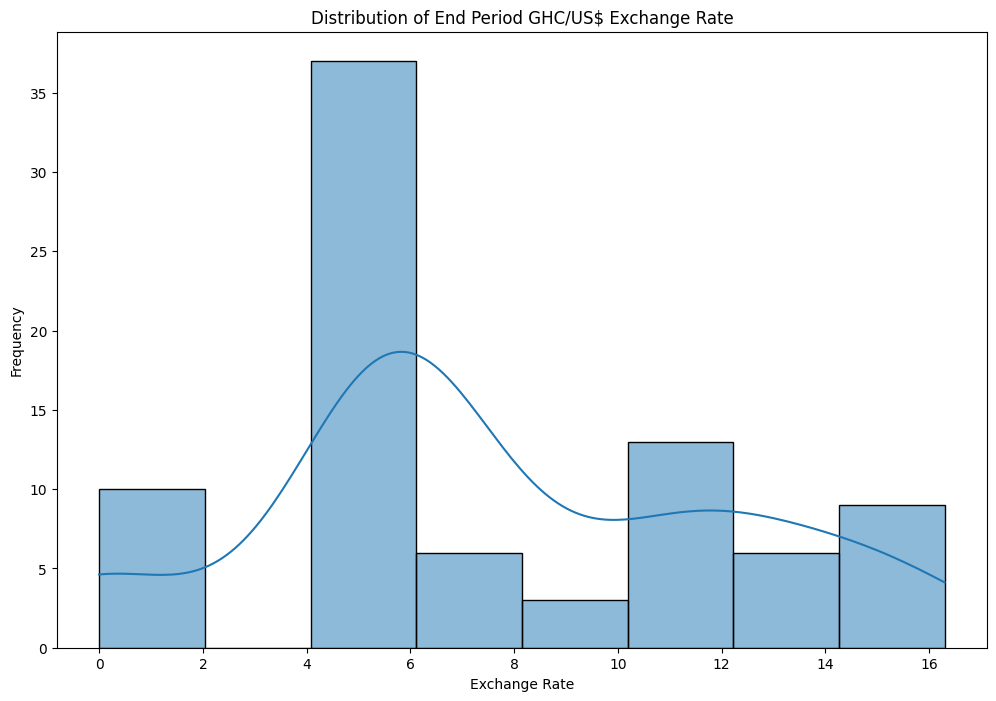

In [113]:
plt.figure(figsize=(12, 8))
sns.histplot(exchange_rates[' Rate - End Period (GHC/US$)'], kde=True)
plt.title('Distribution of End Period GHC/US$ Exchange Rate')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

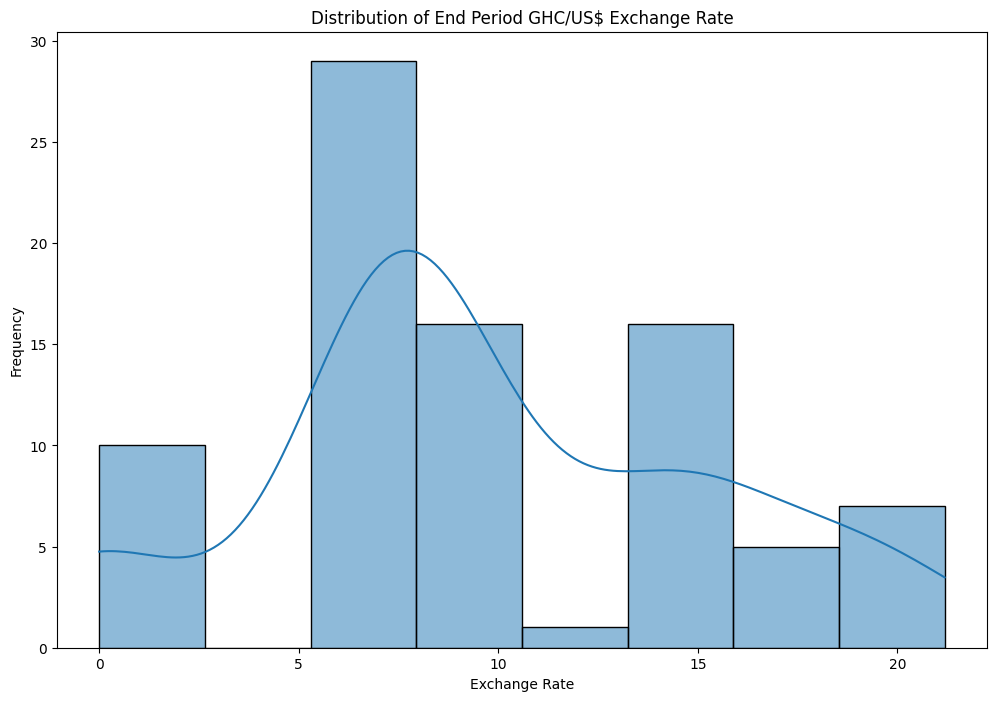

In [115]:
plt.figure(figsize=(12, 8))
sns.histplot(exchange_rates[' Rate - End Period (GHC/GBP)'], kde=True)
plt.title('Distribution of End Period GHC/US$ Exchange Rate')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

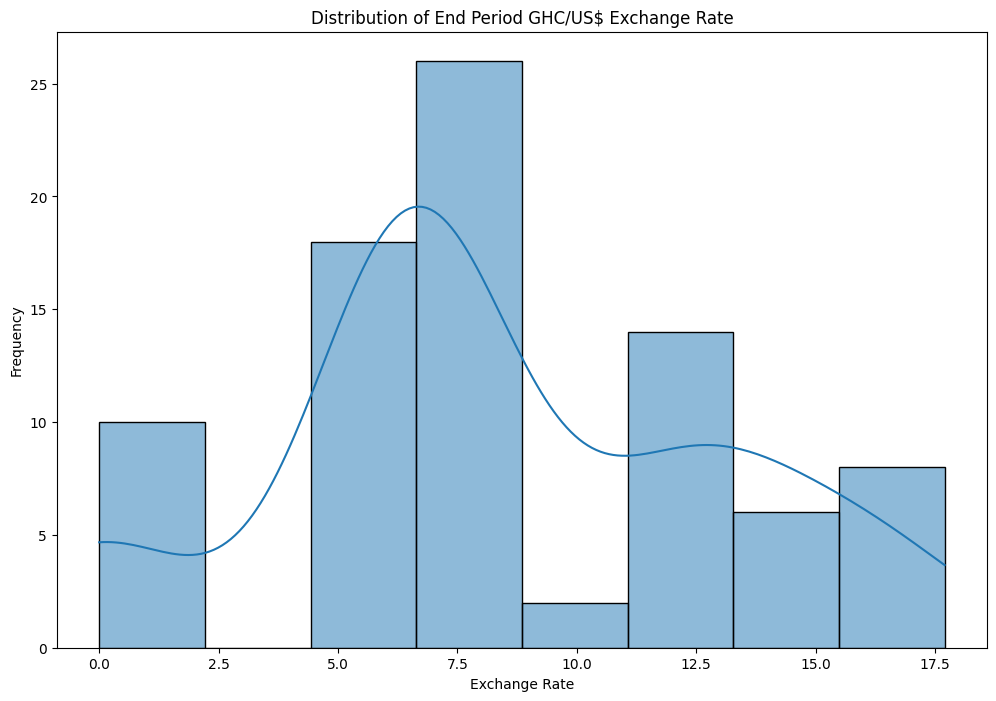

In [117]:
plt.figure(figsize=(12, 8))
sns.histplot(exchange_rates[' Rate - End Period (GHC/EURO)'], kde=True)
plt.title('Distribution of End Period GHC/US$ Exchange Rate')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')

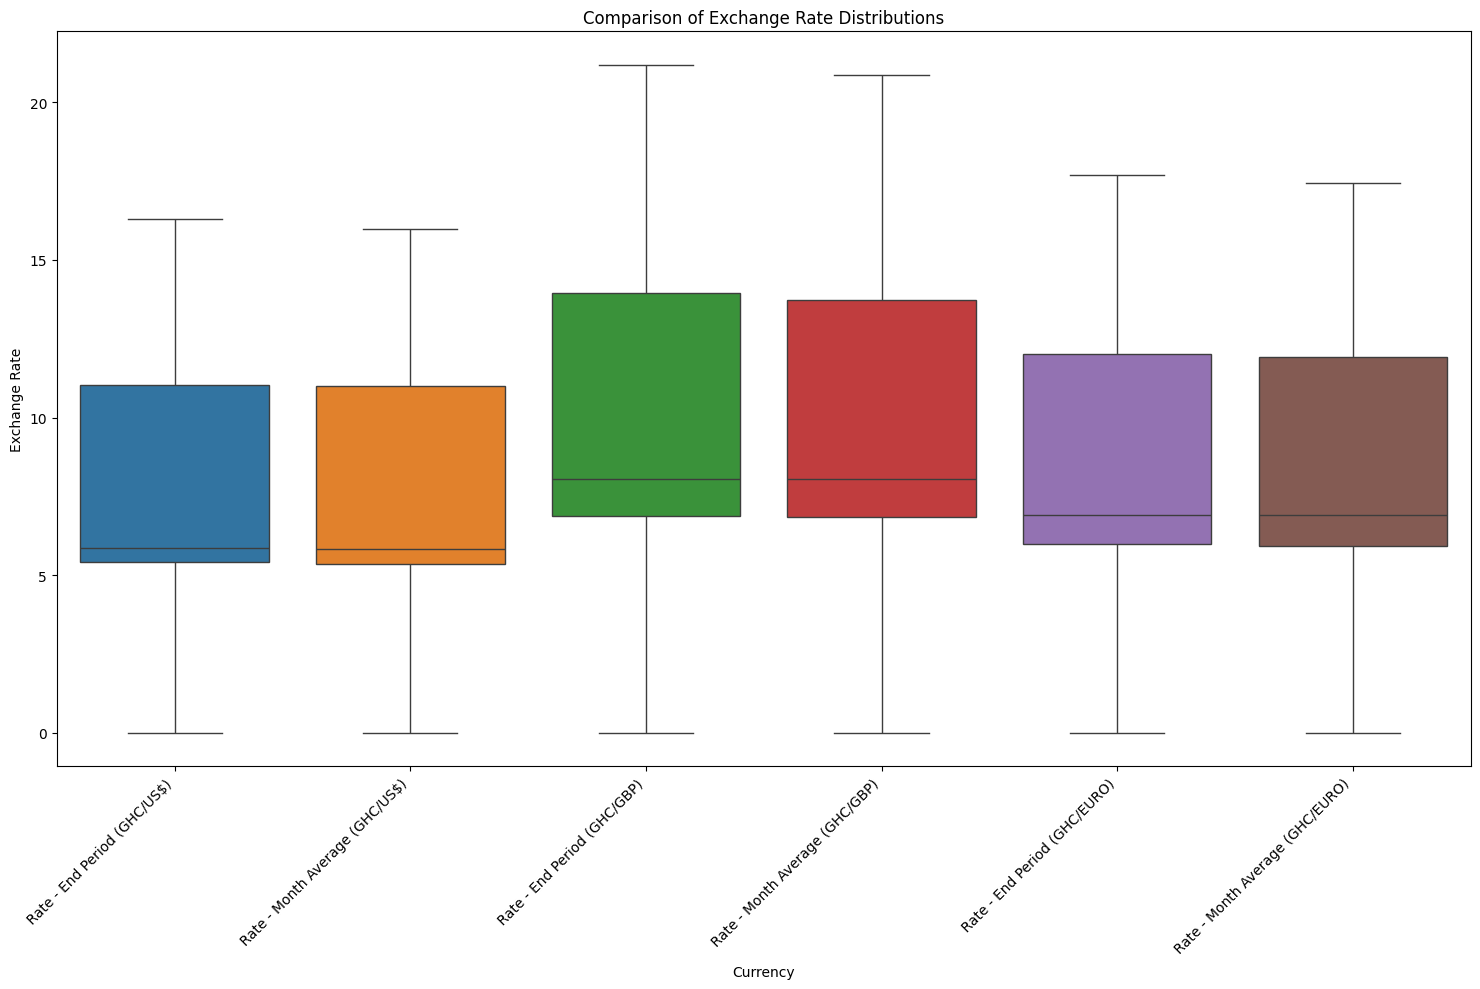

In [123]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=exchange_rates[[' Rate - End Period (GHC/US$)', ' Rate - Month Average (GHC/US$)',
                             ' Rate - End Period (GHC/GBP)', ' Rate - Month Average (GHC/GBP)',
                             ' Rate - End Period (GHC/EURO)', ' Rate - Month Average (GHC/EURO)']])
plt.title('Comparison of Exchange Rate Distributions')
plt.ylabel('Exchange Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

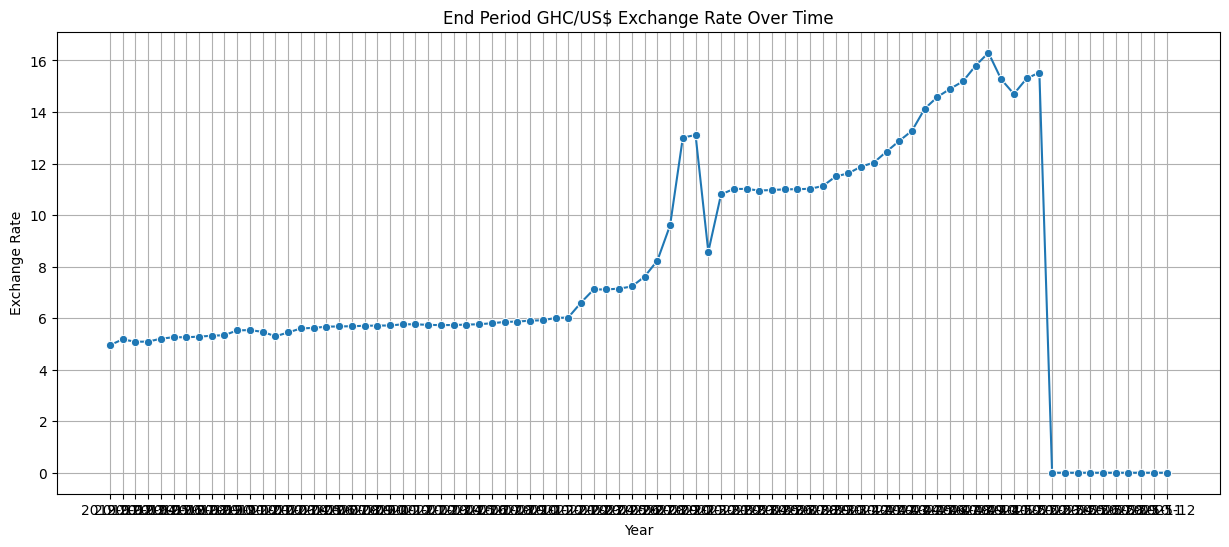

In [125]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year', y=' Rate - End Period (GHC/US$)', data=exchange_rates, marker='o')
plt.title('End Period GHC/US$ Exchange Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.grid(True)

Text(0.5, 1.0, 'Correlation Matrix of Exchange Rates')

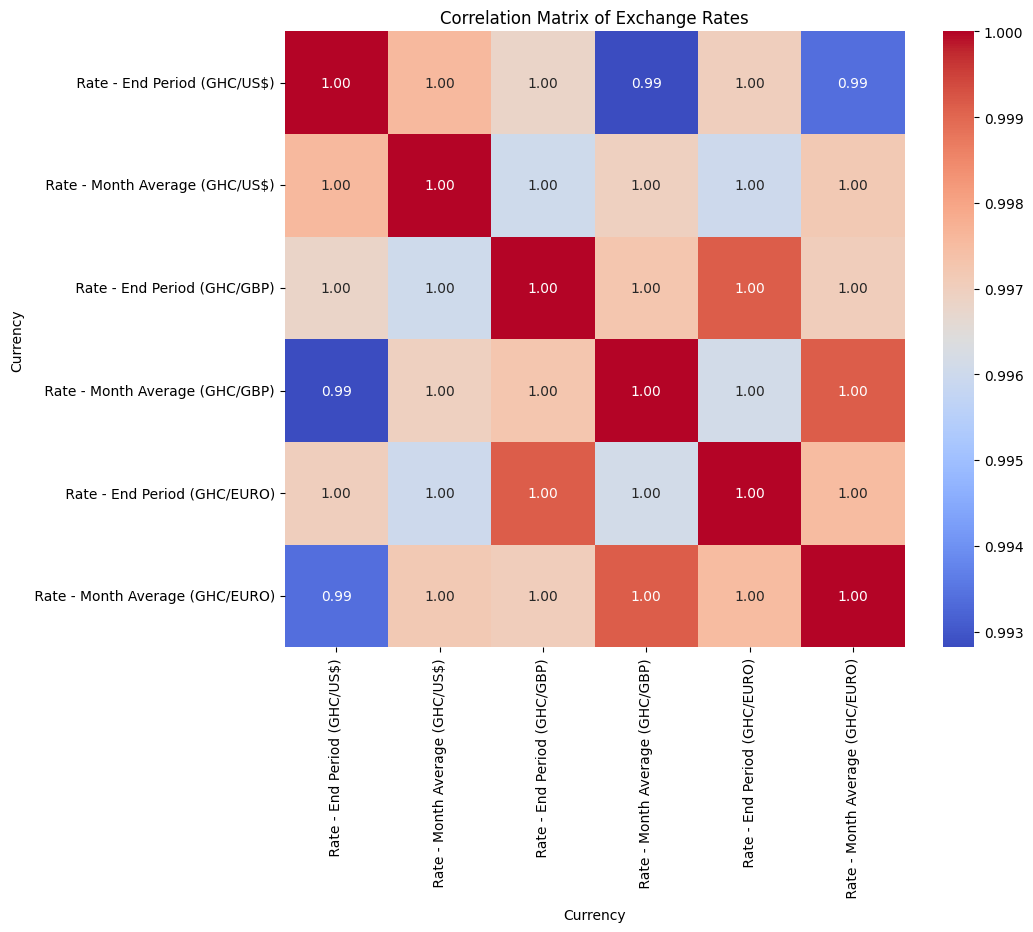

In [127]:
correlation_matrix = exchange_rates[[' Rate - End Period (GHC/US$)', ' Rate - Month Average (GHC/US$)',
                                  ' Rate - End Period (GHC/GBP)', ' Rate - Month Average (GHC/GBP)',
                                  ' Rate - End Period (GHC/EURO)', ' Rate - Month Average (GHC/EURO)']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Exchange Rates')

# Prepare Data for Machine Learning

# Choose targets: We'll use the End Period rates.

In [129]:
target_cols = [
     ' Rate - End Period (GHC/US$)',
     ' Rate - End Period (GHC/EURO)',
     ' Rate - End Period (GHC/GBP)'
]

In [131]:
exchange_cols = [c for c in exchange_rates.columns if ' Rate - End Period' in c]
print(exchange_cols)

[' Rate - End Period (GHC/EURO)', ' Rate - End Period (GHC/GBP)', ' Rate - End Period (GHC/US$)']


In [133]:
feature_cols = [col for col in exchange_rates.columns if col not in target_cols]

In [135]:
X = exchange_rates[feature_cols]
y = exchange_rates[target_cols]

In [137]:
# Convert features to numeric and fill missing values with 0
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
y = y.apply(pd.to_numeric, errors='coerce')
y.fillna(0, inplace = True)

print('feature matrix shape:', X.shape)
print("Target matrix shape:", y.shape)

feature matrix shape: (84, 4)
Target matrix shape: (84, 3)


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
# Build and Train the Multi-Output Regression Model using XGBoost
# Initialize the multi-output regressor with XGBoost as the base estimator.

model = MultiOutputRegressor(XGBRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

In [143]:
y_pred = model.predict(X_test)

In [145]:
y_pred

array([[1.52785378e+01, 1.63635712e+01, 1.91290646e+01],
       [2.63401831e-04, 2.22674789e-04, 2.19478577e-04],
       [1.18792458e+01, 1.25453234e+01, 1.42519722e+01],
       [5.73329449e+00, 6.73498535e+00, 7.87829161e+00],
       [5.50460005e+00, 6.24044657e+00, 7.00051069e+00],
       [1.51917715e+01, 1.67827034e+01, 1.99269238e+01],
       [5.44076920e+00, 6.02267647e+00, 6.89685726e+00],
       [5.66460514e+00, 6.36355829e+00, 7.00120020e+00],
       [5.08858299e+00, 5.70692873e+00, 6.49009800e+00],
       [1.41324768e+01, 1.53348198e+01, 1.80023689e+01],
       [7.20409298e+00, 7.62201452e+00, 8.83766270e+00],
       [9.60294151e+00, 9.41357899e+00, 1.07000561e+01],
       [5.90133476e+00, 6.69982529e+00, 7.41528368e+00],
       [2.63401831e-04, 2.22674789e-04, 2.19478577e-04],
       [1.09440327e+01, 1.19164057e+01, 1.39148293e+01],
       [1.09685802e+01, 1.21301498e+01, 1.39132004e+01],
       [5.86530018e+00, 6.64753819e+00, 7.93063116e+00]], dtype=float32)

In [147]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Absolute Error: 0.5326402008954215
R2 Score: 0.9042458228683373
